In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
df = pd.read_csv ('dataset.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [13]:
print(df['BALANCE'].min())
print(df['BALANCE'].max())
df['BALANCE'].mean()

0.0
19043.13856


1564.4748276781038

In [14]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [27]:
df[df['ONEOFF_PURCHASES']==df ['ONEOFF_PURCHASES'].max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
550  C10574  11547.52001                1.0   49039.57          40761.25   

     INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
550                 8278.32    558.166886                  1.0   

     ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
550                         1.0                          0.916667   

     CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
550                0.083333                 1            101       22500.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
550  46930.59824       2974.069421              0.25      12

In [31]:
df[df['CASH_ADVANCE']==df ['CASH_ADVANCE'].max()]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2159  C12226  10905.05381                1.0     431.93             133.5   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2159                  298.43   47137.21176             0.583333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2159                        0.25                               0.5   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2159                     1.0               123             21       19600.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2159  39048.59762       5394.173671               0.0      12

In [33]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df.loc [(df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [5]:
df.loc [(df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [6]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.drop('CUST_ID', axis = 1 , inplace = True)

Scale the Data

In [10]:
scaler = StandardScaler ()
df_scale = scaler.fit_transform (df)
df_scale

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

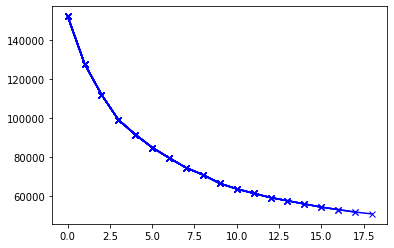

In [11]:
credit_scores =[]

for i in range (1,20):
    kmean = KMeans (n_clusters = i)
    kmean.fit (df_scale)
    credit_scores.append (kmean.inertia_)

    plt.plot (credit_scores, 'bx-')

In [13]:
kmean = KMeans (7)
kmean.fit (df_scale)


label = kmean.labels_

kmean.cluster_centers_.shape

(7, 17)

In [39]:
def unique(a):
    unique, counts = np.unique(label, return_counts=True)
    return np.asarray((unique, counts)).T
unique(label)    

array([[   0, 1188],
       [   1,  628],
       [   2, 1270],
       [   3, 2047],
       [   4,   83],
       [   5, 2841],
       [   6,  893]], dtype=int64)

In [68]:
claster_0 = 1188
claster_1 = 628
claster_2 = 1270
claster_3 = 2047
claster_4 = 83
claster_5 = 2841
claster_6 = 893
array = np.array([1188,628,1270,2047,83,2841,893])
Total_f= np.array([1188,628,1270,2047,83,2841,893]).sum()

for i in range(array.shape[0]):
    l=[]
    outcome += i/Total_f
    l.append(outcome)
return l

SyntaxError: 'return' outside function (<ipython-input-68-00521cea2db3>, line 15)

In [65]:
l

[0.0030167597765363126]

In [58]:
Total_f

8950

In [ ]:

f_prbability = f_sum/Total_f
ff_prbability= ff_sum/Total_f
fff_prbability= fff_sum/Total_f
ffff_prbability= ffff_sum/Total_f

price_ranges = np.array([f_prbability,ff_prbability,fff_prbability,ffff_prbability]).round(2)*100 
labels = ["£", "££", "£££","££££"]
myexplode = [0.1,0,0,0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(price_ranges, labels=labels,colors=colors, explode = myexplode, autopct='%1.1f%%', shadow=True)
plt.title("Probability of Choosing a Pub by its Price Range")

plt.show()


df_price_ranges = pd.DataFrame(price_ranges, index=  ["£", "££", "£££","££££"])
df_price_ranges[0] = df_price_ranges[0].apply(lambda x: str(x) + "%")
print(df_price_ranges)

In [40]:
label

array([5, 6, 2, ..., 1, 1, 1])

In [79]:
cluster_centers = pd.DataFrame (data = kmean.cluster_centers_, columns= [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.701904         -2.134551 -0.306916        -0.230647   
1 -0.369048          0.332929 -0.041536        -0.231528   
2 -0.335506         -0.348076 -0.284525        -0.208973   
3  1.668208          0.393829 -0.200945        -0.147915   
4  0.144476          0.430928  0.976231         0.923401   
5  0.008540          0.401363 -0.342246        -0.222228   
6  1.526356          0.405003  7.356829         6.461232   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.301846    -0.323078           -0.546754   
1               0.326974    -0.367276            0.975451   
2              -0.288475     0.065539           -0.198735   
3              -0.203474     1.996791           -0.452349   
4               0.611812    -0.306635            1.101234   
5              -0.400855    -0.103203           -0.811516   
6               5.521867     0.021953            1.075498   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.428845                        -0.440392   
1                  -0.345627                         1.164648   
2                  -0.272572                        -0.230755   
3                  -0.186430                        -0.400905   
4                   1.878991                         0.550014   
5                  -0.331710                        -0.757350   
6                   1.841044                         1.035877   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.522249        -0.376815     -0.416229    -0.172322   
1              -0.477373        -0.362570      0.170750    -0.276216   
2               0.304112        -0.002216     -0.385586    -0.556898   
3               1.913041         1.926560     -0.236713     1.011591   
4              -0.405854        -0.315567      1.230596     0.721980   
5               0.086343        -0.039659     -0.464321    -0.300029   
6              -0.314437        -0.112661      4.864643     2.242065   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.201754        -0.257536         0.297891  0.202040  
1 -0.223598        -0.031029         0.297064  0.253311  
2 -0.390701        -0.209383         0.012899 -3.193765  
3  0.839002         0.553094        -0.391156  0.068828  
4  0.414282        -0.029979         0.472993  0.307263  
5 -0.246977        -0.015424        -0.451627  0.271810  
6  5.069151         1.204065         0.810717  0.330790

In [99]:
inverse_cluster = scaler.inverse_transform (cluster_centers)
inverse_cluster = pd.DataFrame (data = cluster_center, columns= [df.columns])
inverse_cluster

BALANCE BALANCE_FREQUENCY     PURCHASES ONEOFF_PURCHASES  \
0  1.764743e+25          1.149568  7.070511e+25     7.286778e+24   
1  1.349013e+26          1.149592  1.859221e+26     7.236013e+24   
2  1.467171e+26          1.149586  8.042623e+25     8.535235e+24   
3  8.525568e+26          1.149593  1.167135e+26     1.205227e+25   
4  3.157982e+26          1.149593  6.277944e+26     7.376197e+25   
5  2.679125e+26          1.149593  5.536619e+25     7.771698e+24   
6  8.025870e+26          1.149593  3.397985e+27     3.927510e+26   

  INSTALLMENTS_PURCHASES  CASH_ADVANCE PURCHASES_FREQUENCY  \
0           6.851840e+22  5.382902e+25            0.818172   
1           3.496946e+23  3.729926e+25            0.819197   
2           7.449700e+22  1.991695e+26            0.818406   
3           1.125052e+23  9.214467e+26            0.818236   
4           4.770596e+23  5.997854e+25            0.819282   
5           2.424665e+22  1.360609e+26            0.817994   
6           2.672588e+24  1.828686e+26            0.819264   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.288488                         0.604150   
1                   0.288493                         0.605149   
2                   0.288497                         0.604281   
3                   0.288503                         0.604175   
4                   0.288632                         0.604766   
5                   0.288494                         0.603953   
6                   0.288630                         0.605069   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX  CREDIT_LIMIT  \
0               0.168952     8.513529e+05  2.919627e+10  3.265477e+28   
1               0.168952     9.183604e+05  1.147244e+11  2.946409e+28   
2               0.168954     2.613388e+06  3.366113e+10  2.084410e+28   
3               0.168958     1.168593e+07  5.535336e+10  6.901379e+28   
4               0.168952     1.139453e+06  2.691535e+11  6.011957e+28   
5               0.168953     2.437265e+06  2.218877e+10  2.873277e+28   
6               0.168952     2.093880e+06  7.986667e+11  1.068027e+29   

       PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT      TENURE  
0  1.958918e+27     9.870772e+25         0.217264  318.312711  
1  1.851171e+27     2.957737e+26         0.217264  318.840164  
2  1.026929e+27     1.406018e+26         0.217248  283.378063  
3  7.092491e+27     8.039733e+26         0.217227  316.942276  
4  4.997538e+27     2.966876e+26         0.217273  319.395197  
5  1.735851e+27     3.093507e+26         0.217223  319.030472  
6  2.795789e+28     1.370332e+27         0.217291  319.637234

In [101]:
y = kmean.fit_predict (df_scale)
y

array([6, 5, 3, ..., 0, 0, 0])

In [103]:
newdf = pd.concat ([df, pd.DataFrame ({'cluster': label})], axis =1 )
newdf

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        5  
1     4103.032597       1072.340217          0.222222      12        3  
2      622.066742        627.284787          0.000000      12        4  
3        0.000000        864.206542          0.000000      12        5  
4      678.334763        244.791237          0.000000      12        5  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

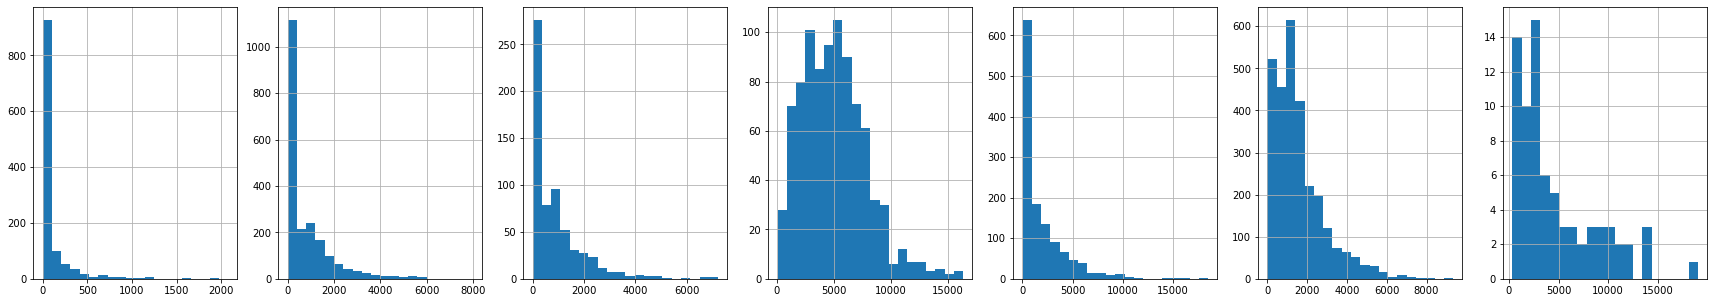

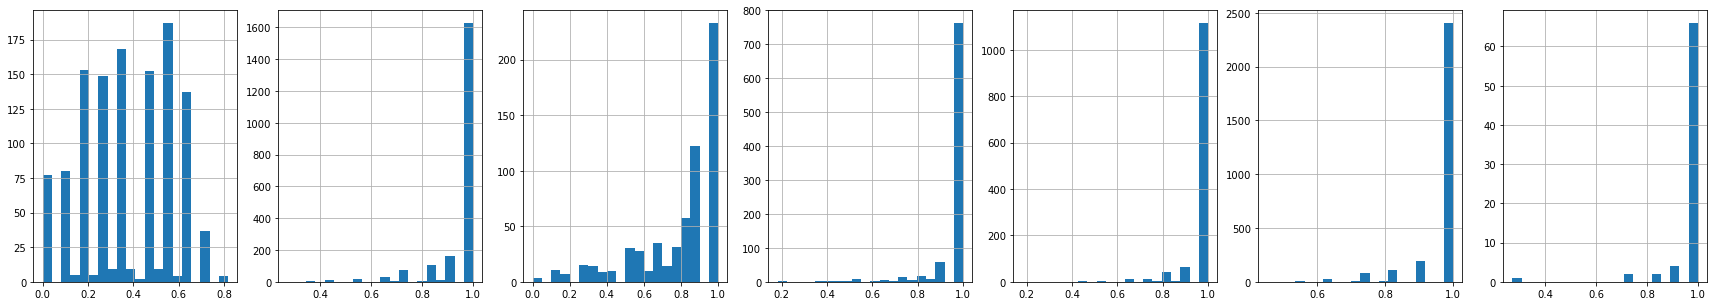

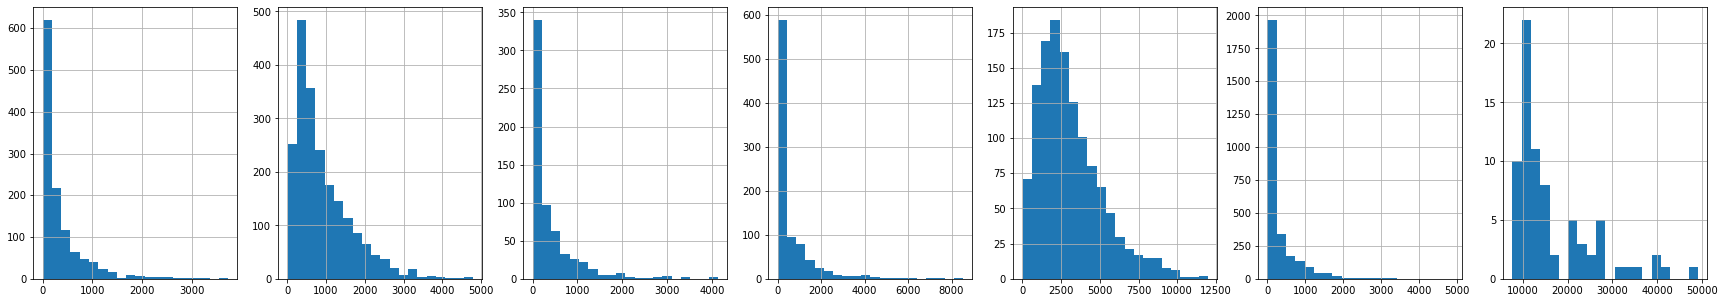

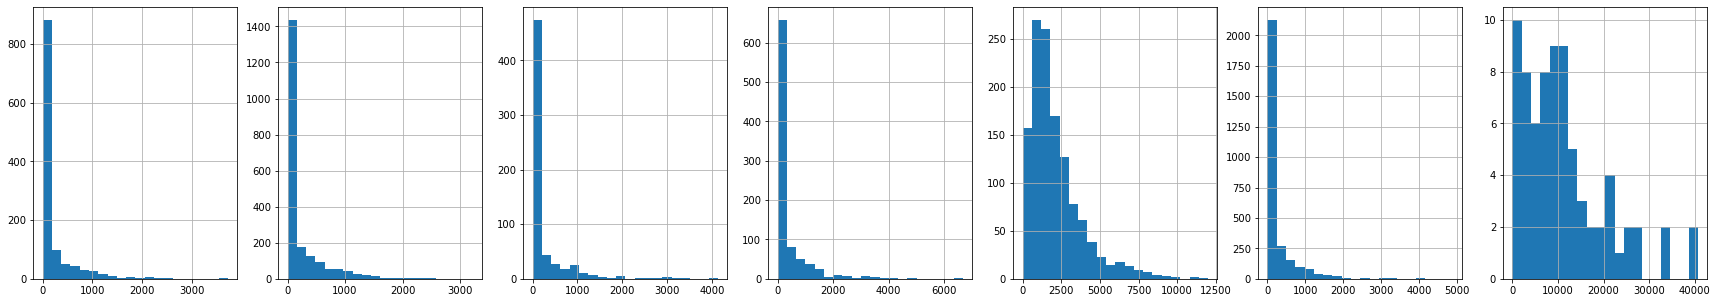

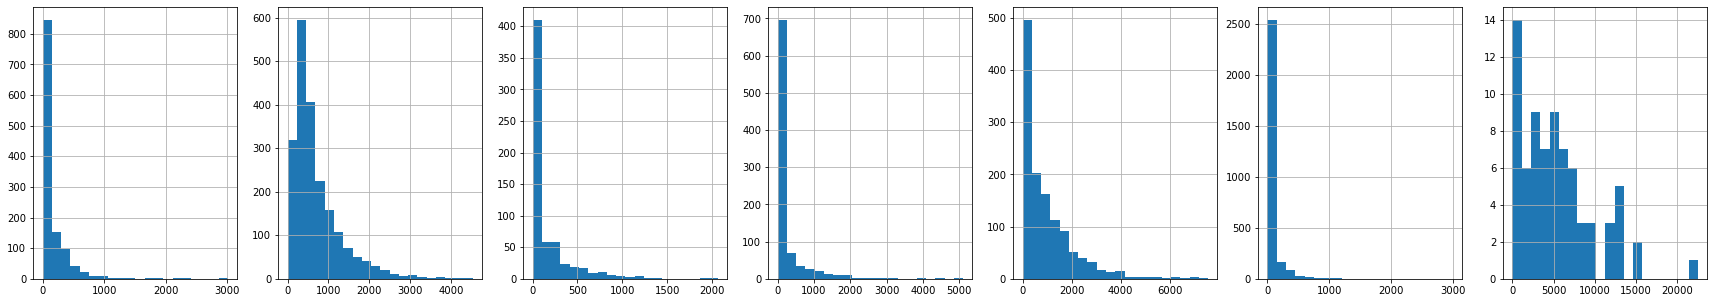

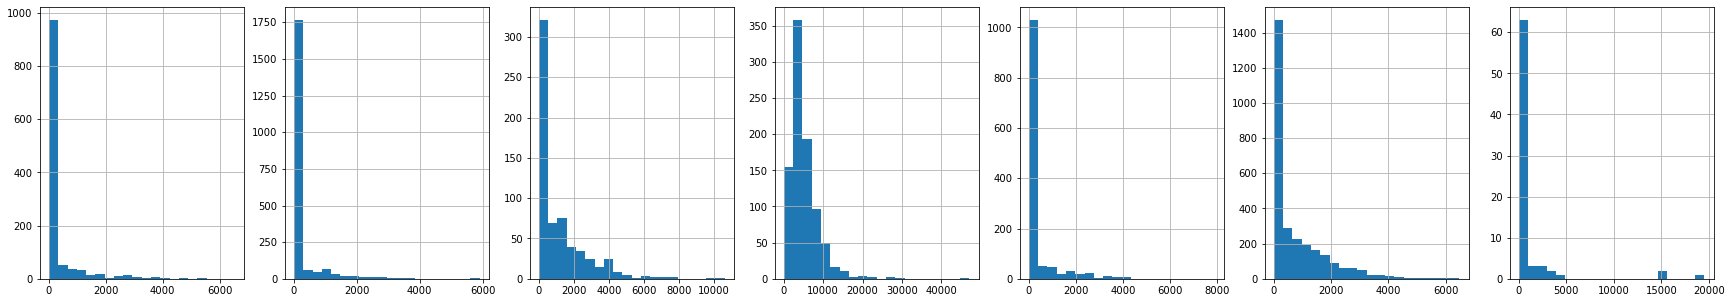

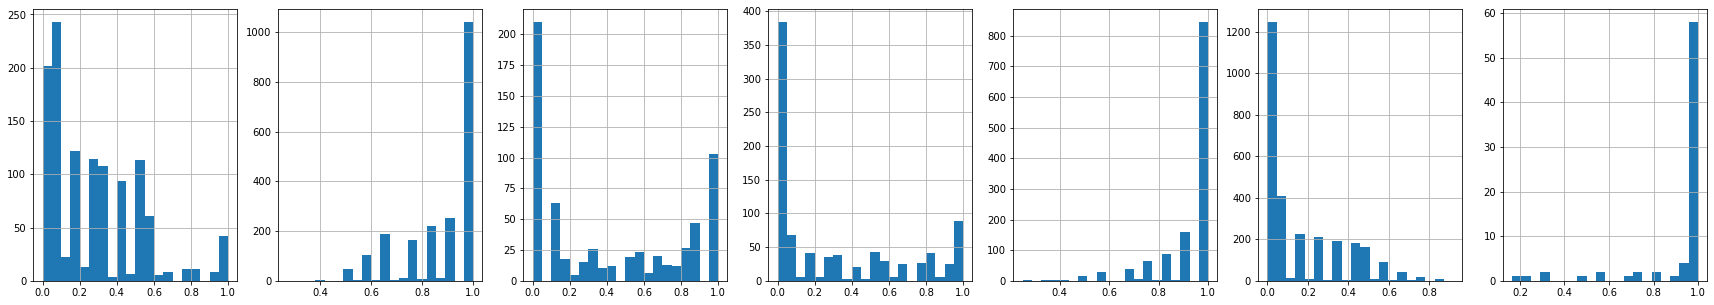

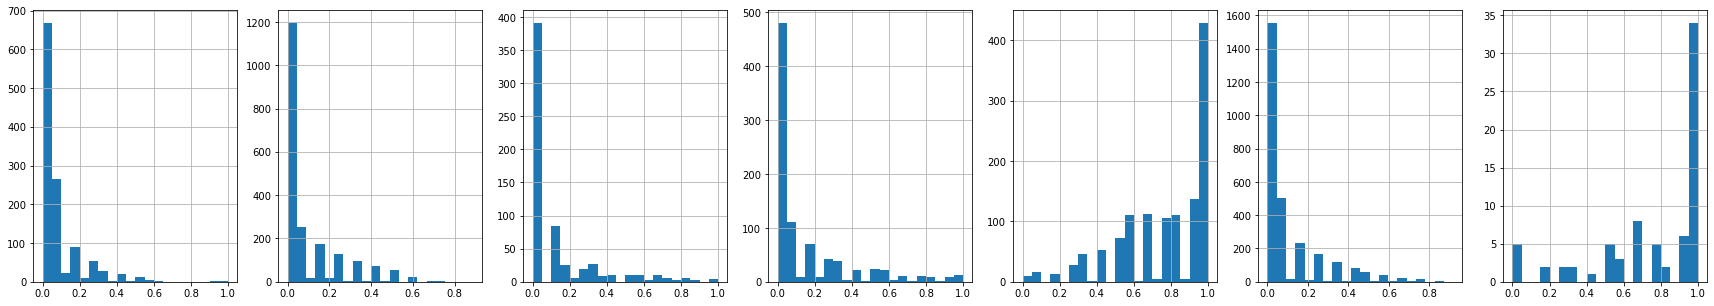

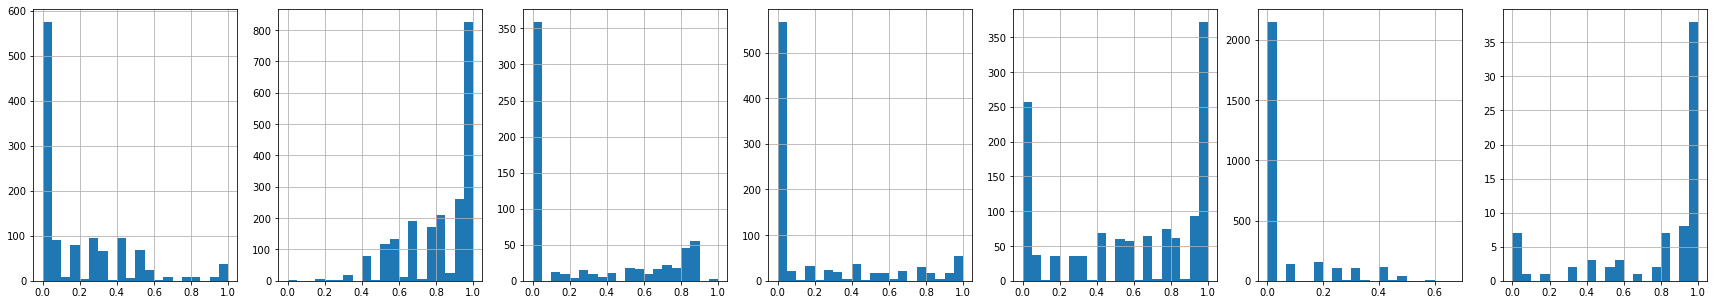

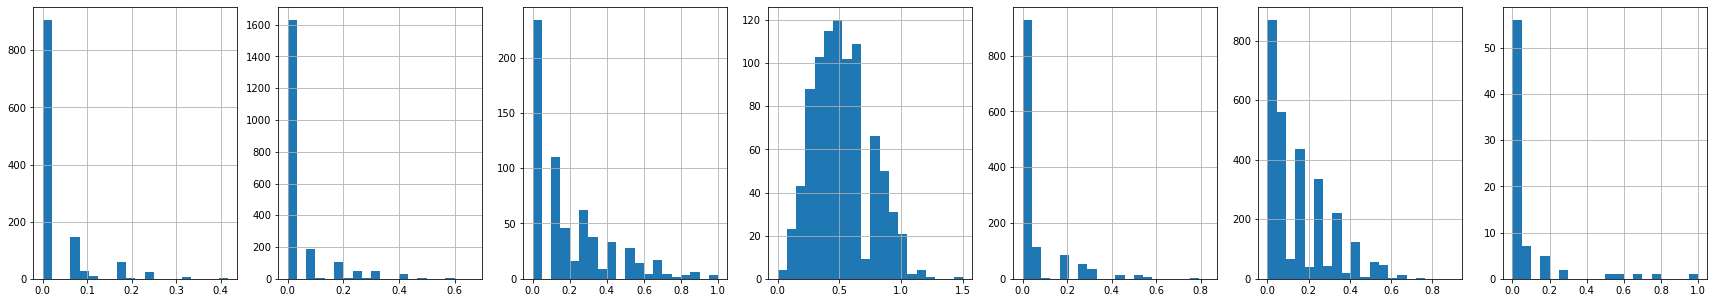

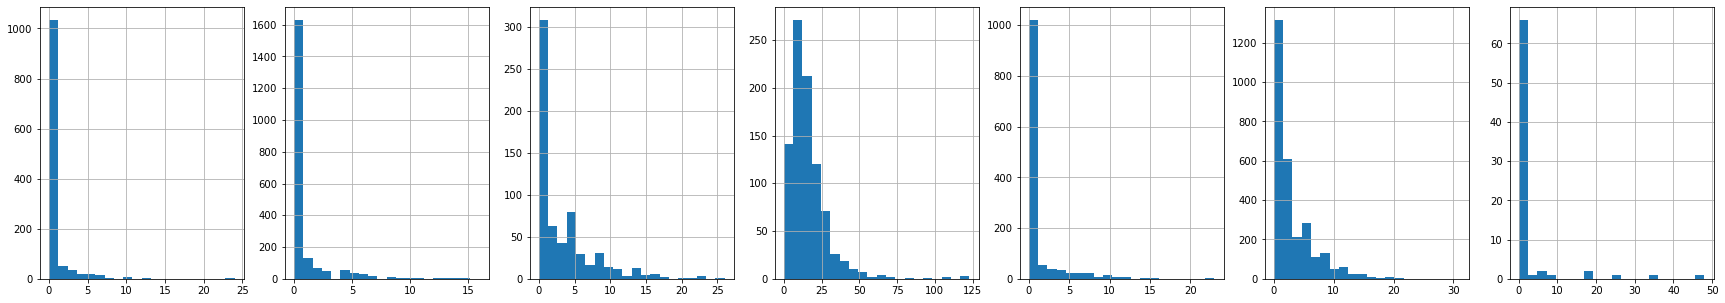

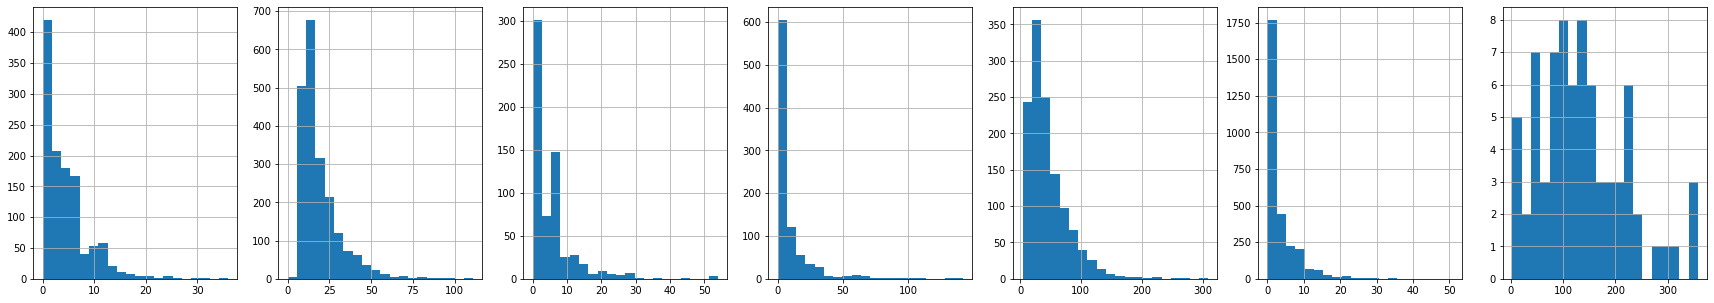

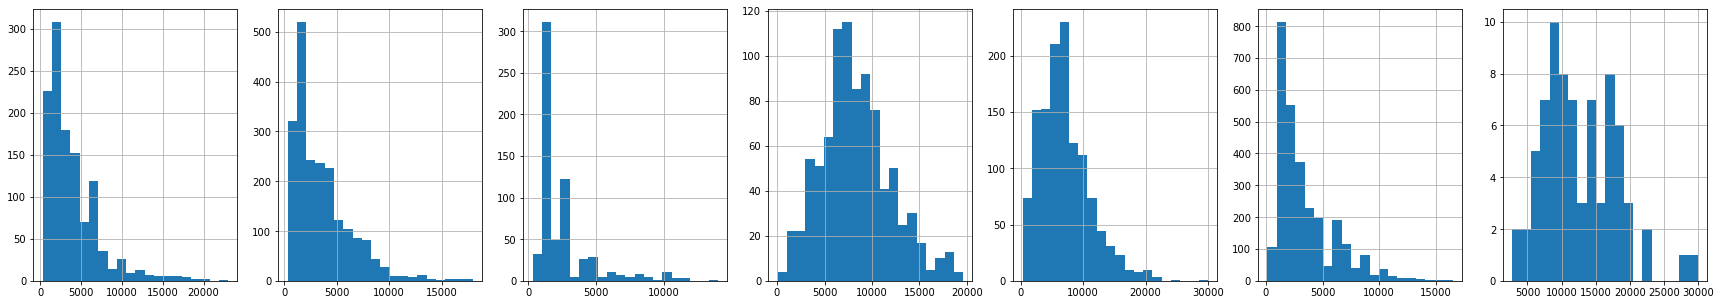

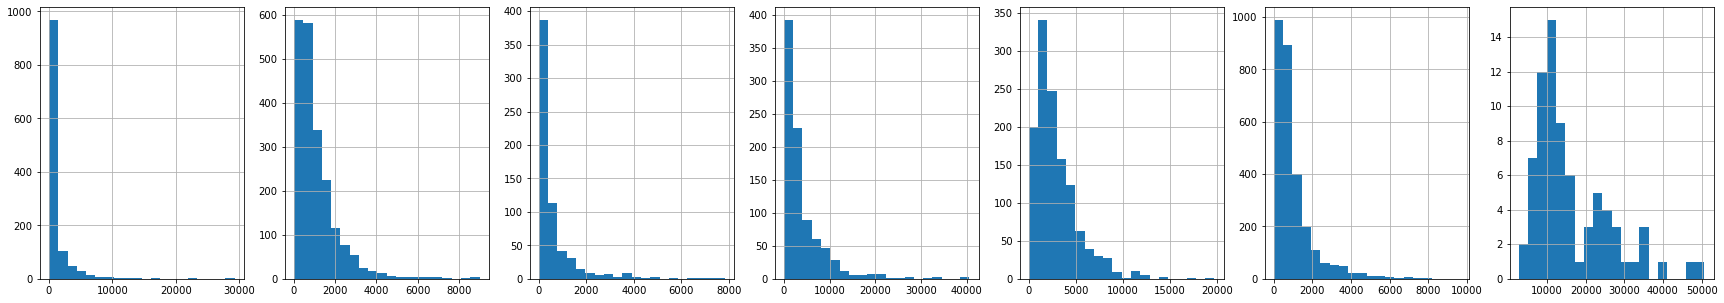

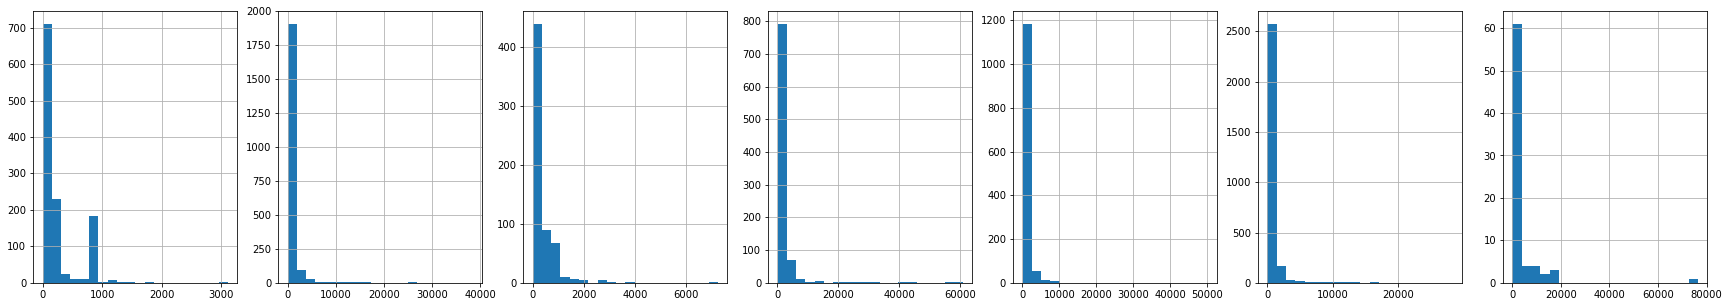

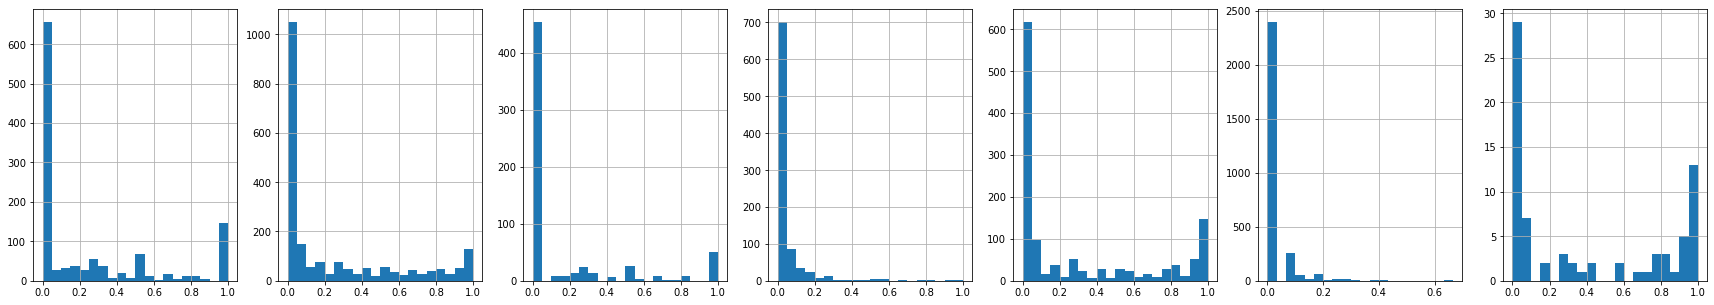

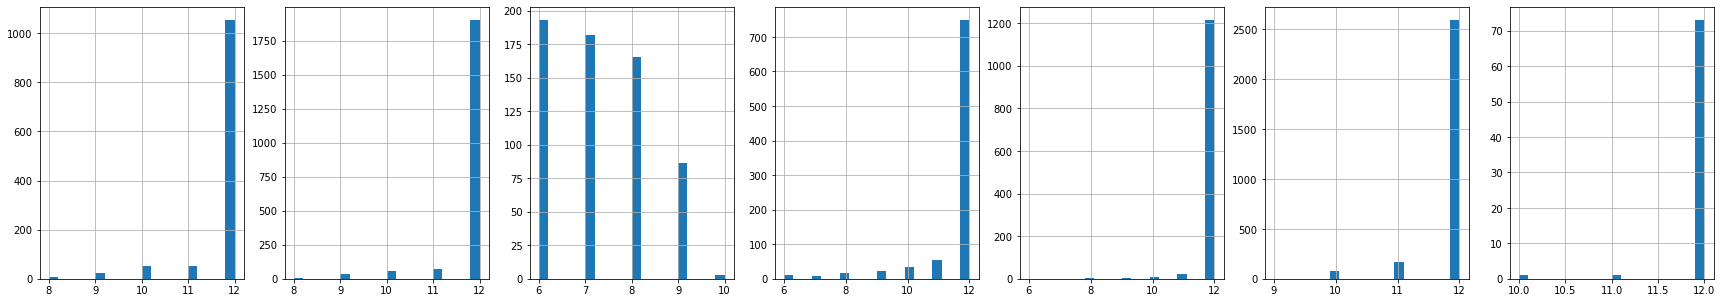

In [110]:
for i in df.columns:
    plt.figure (figsize = (30,5))
    for j in range (7):
        plt.subplot (1 , 7, j+1)
        cluster =newdf [newdf['cluster']==j]
        cluster [i].hist (bins =20)
    plt.show()  

In [111]:
pca = PCA (n_components = 2)
pca_fit= pca.fit_transform (df_scale)
pca_fit


array([[-1.68222067, -1.0764491 ],
       [-1.13829428,  2.50649665],
       [ 0.96968581, -0.3835211 ],
       ...,
       [-0.9262046 , -1.8107935 ],
       [-2.33655331, -0.65798449],
       [-0.55642156, -0.40048021]])

In [113]:
pca_df = pd.DataFrame (data=pca_fit, columns = ['pca1', 'pca2'])
pca_df

pca1      pca2
0    -1.682221 -1.076449
1    -1.138294  2.506497
2     0.969686 -0.383521
3    -0.873628  0.043185
4    -1.599434 -0.688587
...        ...       ...
8945 -0.359630 -2.016153
8946 -0.564371 -1.639131
8947 -0.926205 -1.810793
8948 -2.336553 -0.657984
8949 -0.556422 -0.400480

[8950 rows x 2 columns]

In [115]:
pca_df = pd.concat ([pca_df, pd.DataFrame({'cluster': label})], axis = 1)
pca_df

pca1      pca2  cluster
0    -1.682221 -1.076449        5
1    -1.138294  2.506497        3
2     0.969686 -0.383521        4
3    -0.873628  0.043185        5
4    -1.599434 -0.688587        5
...        ...       ...      ...
8945 -0.359630 -2.016153        2
8946 -0.564371 -1.639131        2
8947 -0.926205 -1.810793        2
8948 -2.336553 -0.657984        2
8949 -0.556422 -0.400480        2

[8950 rows x 3 columns]

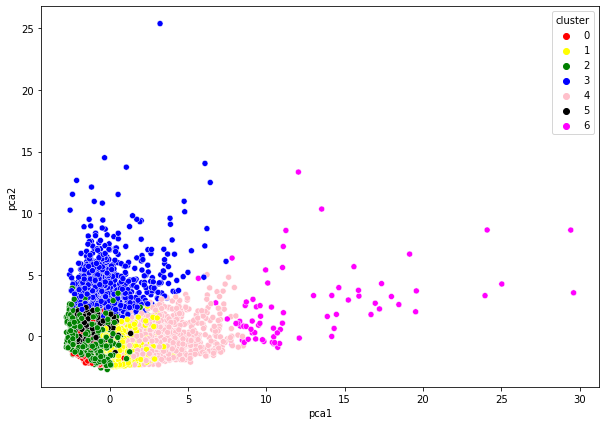

In [125]:
plt.figure (figsize = (10,7))
ax =sns.scatterplot (x = 'pca1', y ='pca2', hue = 'cluster', data = pca_df, palette = ['red', 'yellow', 'green','blue','pink','black', 'magenta'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18074c2b-cdf2-4daa-b880-e946f5464312' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>